<a href="https://colab.research.google.com/github/baghelmayank2/minor3/blob/main/Final_Minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing pandas library for Data manipulation

In [1]:
import pandas as pd

url of file where the csv file is importing

In [2]:
url="https://raw.githubusercontent.com/baghelmayank2/minor3/main/customer%20churn%20-%20TOM%20-%20Sheet1%20(1).csv"

In [3]:
df=pd.read_csv(url)

Top 5 elements of file

In [4]:
df.head(5)

,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineBackup,Contract,PaperlessBilling,Churn
0,29.85,Female,0,Yes,No,1,DSL,Yes,Month-to-month,Yes,No
1,56.95,Male,0,No,No,34,DSL,No,One year,No,No
2,53.85,Male,0,No,No,2,DSL,Yes,Month-to-month,Yes,Yes
3,42.30,Male,0,No,No,45,DSL,No,One year,No,No
4,70.70,Female,0,No,No,2,Fiber optic,No,Month-to-month,Yes,Yes


Data Type of  each Columns

In [5]:
df.dtypes

MonthlyCharges      float64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
InternetService      object
OnlineBackup         object
Contract             object
PaperlessBilling     object
Churn                object
dtype: object

printing unique elements present in each columns

In [6]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [7]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [10]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

Replacing " No Internet Service" to No

In [11]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [12]:
df.OnlineBackup.unique()

array(['Yes', 'No'], dtype=object)

Replacing yes or No present in each columns to 1 and 0 because machine algo understand Numeric values only

In [13]:
yes_no_columns = ['Partner','Dependents','OnlineBackup',
                  'Churn','PaperlessBilling']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

Replacing Male and Female to 0 and 1

In [14]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [15]:
df.head(5)

,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineBackup,Contract,PaperlessBilling,Churn
0,29.85,1,0,1,0,1,DSL,1,Month-to-month,1,0
1,56.95,0,0,0,0,34,DSL,0,One year,0,0
2,53.85,0,0,0,0,2,DSL,1,Month-to-month,1,1
3,42.30,0,0,0,0,45,DSL,0,One year,0,0
4,70.70,1,0,0,0,2,Fiber optic,0,Month-to-month,1,1


Converting string value into numeric value

In [16]:
df1 = pd.get_dummies(data=df, columns=['InternetService','Contract'])
df1.columns

Index(['MonthlyCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'OnlineBackup', 'PaperlessBilling', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')

In [17]:
df1.head(5)

,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineBackup,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,29.85,1,0,1,0,1,1,1,0,1,0,0,1,0,0
1,56.95,0,0,0,0,34,0,0,0,1,0,0,0,1,0
2,53.85,0,0,0,0,2,1,1,1,1,0,0,1,0,0
3,42.30,0,0,0,0,45,0,0,0,1,0,0,0,1,0
4,70.70,1,0,0,0,2,0,1,1,0,1,0,1,0,0


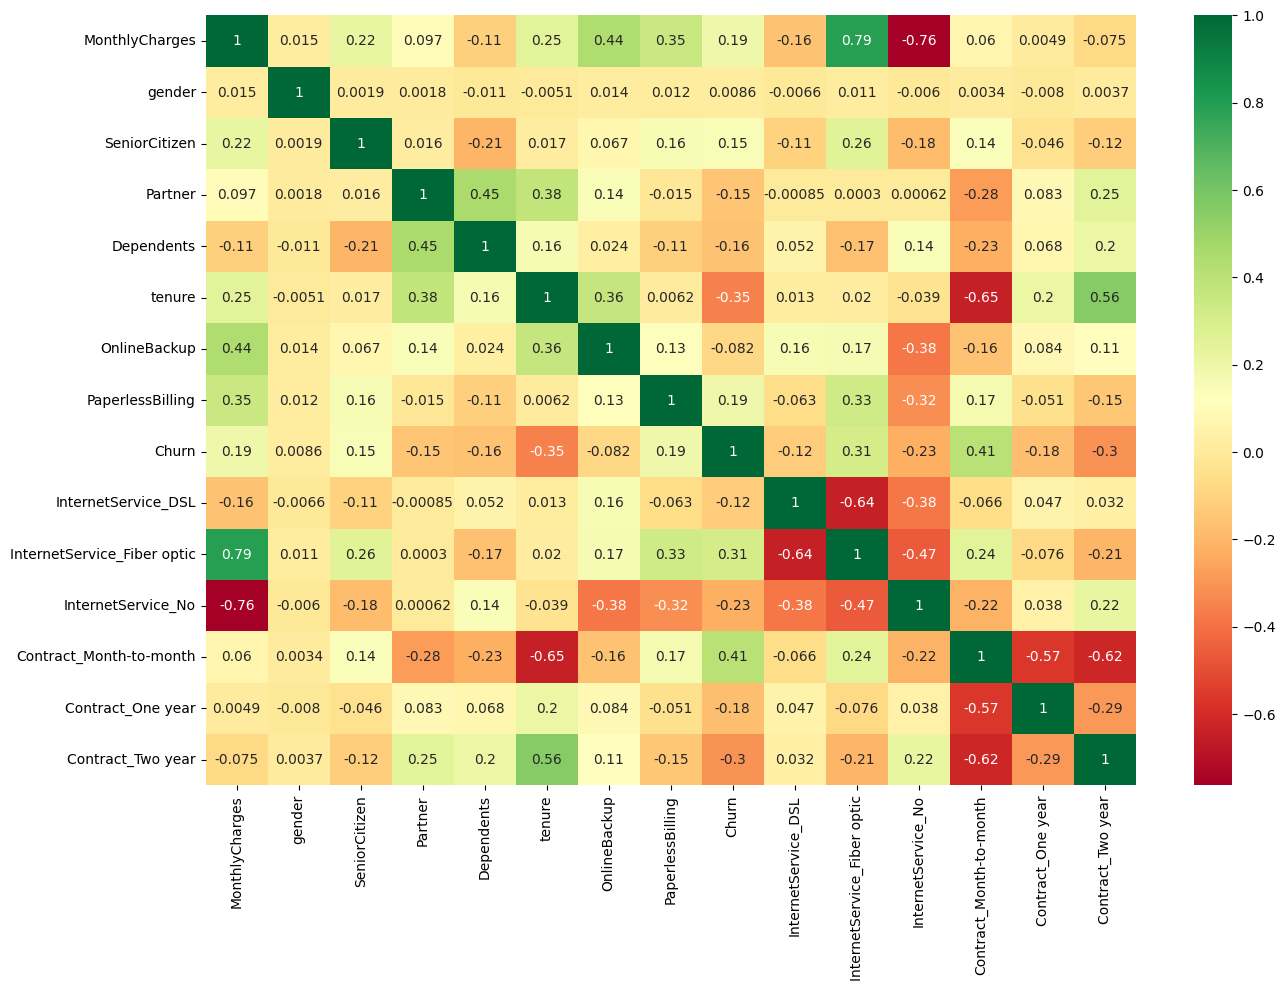

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat=df1.corr()
top=corrmat.index
plt.figure(figsize=(15,10))
g=sns.heatmap(df1[top].corr(),annot=True,cmap='RdYlGn')

Removing Target Column From the table

In [19]:

target_name="Churn"
X = df1.drop('Churn', axis=1)
y=df1[target_name]

Train Test Split of Data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [22]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
pre=logreg.predict(X_test)

In [24]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual or Truth')
    plt.xlabel('Prediction')


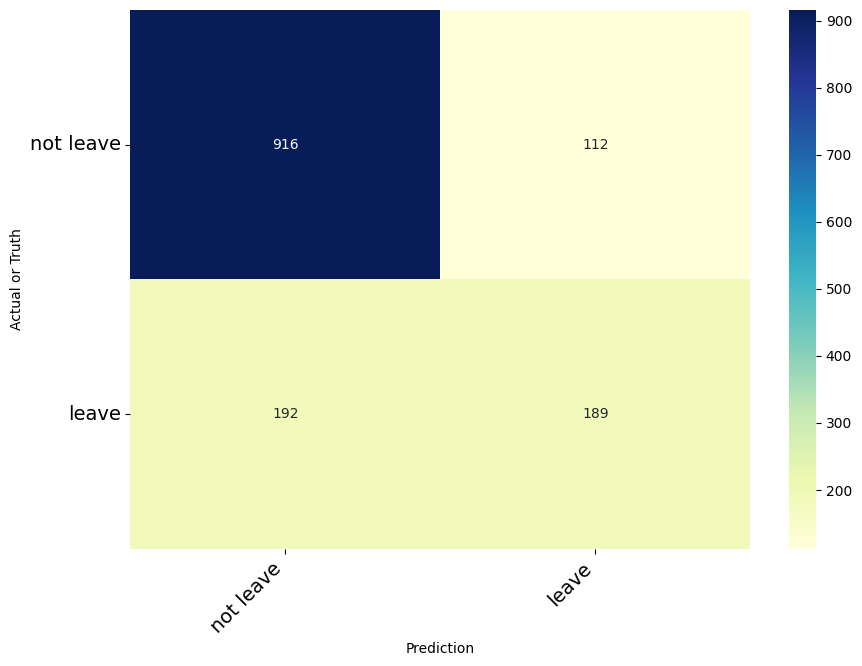

In [25]:
cm = confusion_matrix(y_test,pre)
print_confusion_matrix(cm,["not leave","leave"])

In [26]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1028
           1       0.63      0.50      0.55       381

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.77      0.78      0.78      1409



Decision Tree

In [27]:

treemodel = tree.DecisionTreeClassifier()
skk=StratifiedKFold(shuffle=True,n_splits=10)
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
score3=cross_val_score(treemodel,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score3.mean())

0.7271991484322841


In [29]:

score2=cross_val_score(treemodel,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score2.mean())

0.7139969604863222


In [30]:
pretree=treemodel.predict(X_test)

In [31]:
print(classification_report(y_test,pretree))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1028
           1       0.48      0.46      0.47       381

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.71      0.72      0.72      1409



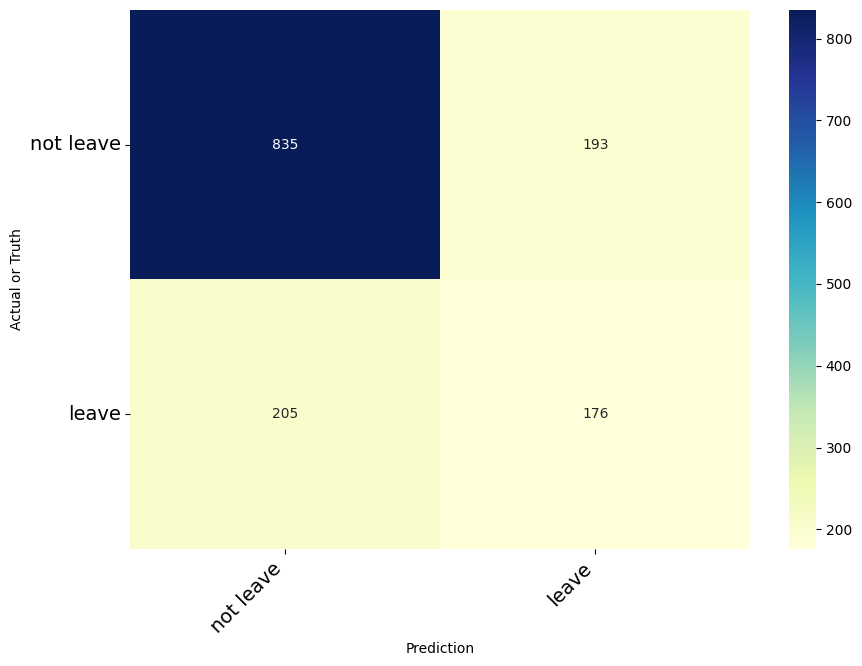

In [32]:
cm = confusion_matrix(y_test,pretree)
print_confusion_matrix(cm,["not leave","leave"])

Random Forest

In [33]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
rpretree=rf.predict(X_test)

In [35]:

score7=cross_val_score(rf,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score7.mean())

0.7850525301386946


In [36]:
score8=cross_val_score(rf,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score8.mean())

0.7522998986828774


In [37]:
print(classification_report(y_test,rpretree))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1028
           1       0.57      0.43      0.49       381

    accuracy                           0.76      1409
   macro avg       0.69      0.65      0.66      1409
weighted avg       0.74      0.76      0.75      1409



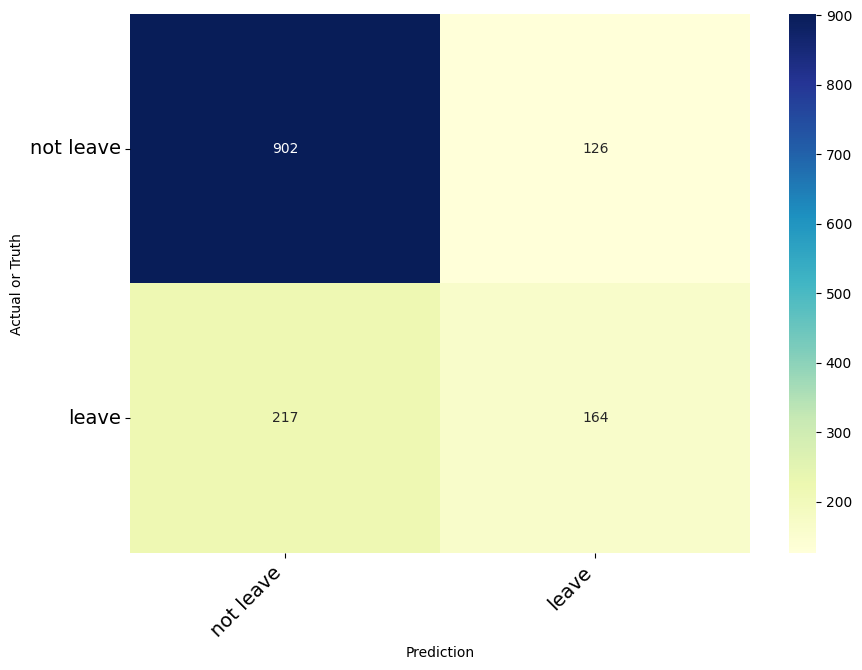

In [38]:
cm = confusion_matrix(y_test,rpretree)
print_confusion_matrix(cm,["not leave","leave"])

In [39]:
import pickle

In [40]:
with open('Telecom','wb') as file:
  pickle.dump(logreg,file)

In [41]:

with open('Telecom','rb') as file:
  Telecom= pickle.load(file)

In [42]:
Telecom.predict([[29,1,0,1,0,1,1,1,1,0,0,1,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])